In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

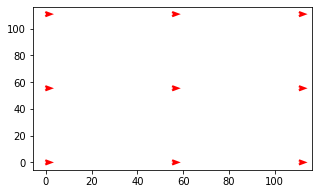

In [2]:
n=150
x,y = np.meshgrid(np.linspace(0,n,n),np.linspace(0,n,n))

u = 10+0*y#(0.7-1*y**2)
v = 0*y#(0.2+1*x**2)
vfield = (u,v)
skip = (slice(None, None, 55), slice(None, None, 55))


fig, ax = plt.subplots(figsize=(5, 3))
#plt.quiver(x,y,u,v)
plt.quiver(x[skip], y[skip], u[skip], v[skip], color='red',headwidth=3, scale=340,headlength=4)


<function matplotlib.pyplot.show(*args, **kw)>

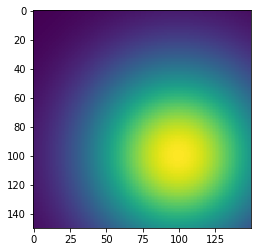

In [3]:
h0= 50*np.exp(-0.00025*(x-100)**2-0.00025*(y-100)**2)+ 50*np.exp(-0.00025*(x-300)**2-0.00025*(y-300)**2)#+np.random.randint(0,25,(n,n)) #depth profile
plt.imshow(h0)
plt.show

In [ ]:
from PIL import Image
image = Image.open('/content/heightmap (1).png')
image = np.array(image)
print(image[1].size)
from skimage.transform import resize
image_resized =resize(image, (n, n))
h = 50*(image_resized+0.000025*np.exp(-0.00025*(x-100)**2-0.00025*(y-100)**2) + 0.000025*np.exp(-0.00025*(x-300)**2-0.00025*(y-300)**2))
plt.imshow(h)

In [62]:
run=0
mineral_umbral=3000
tmax=100

times=[t for t in range(1,tmax)]
runs=[]
df=pd.DataFrame({'time':times})

print(df)

    time
0      1
1      2
2      3
3      4
4      5
..   ...
94    95
95    96
96    97
97    98
98    99

[99 rows x 1 columns]


In [63]:

for k in np.linspace(0,0.1,20):
    z= 0+0*x
    run +=1
    r  = 1  #firs,second,... neighbour radious
    a=np.random.uniform(0, n-1, size=(230,2))
    for i,j in a:
        z[int(i),int(j)]=1

    d=10/n
    #phi_0 = np.random.randint(0,1,size=(n,n))

    
    #Ca2_min=[]
    Ca2_mean=[]
    #Ca2_max=[]
    population=[]
    


    for t in range(1,tmax):
        rx,ry = np.random.randint(1,n- r  ,n) ,np.random.randint(1,n- r  ,n)
        #u = k+0*y#0.7-0.2*np.sin(t/5)*x
        #v = 0*y#0.2+0.2*np.sin(t/5)*y
        #vfield = (u,v)
        
        h=h0
        #h=h0*np.sin(t/5)
        for i in rx:
            for j in ry:

                if (z[i+ r  ,j+ r  ]>0 or z[i- r  ,j- r  ]> 0 or
                  z[i+ r  ,j- r  ]>0 or z[i- r  ,j+ r  ]> 0 or
                  z[i ,j- r  ]>0 or z[i ,j+ r  ]> 0 or
                  z[i+ r  ,j]>0 or z[i- r  ,j]> 0)  and (z[i ,j+ r  ]<0.5 and z[i + r ,j ]<0.5  and z[i ,j- r  ]<0.5 and z[i - r ,j ]<0.5 ):
                    '''
                    if (z[i+ r  ,j+ r  ]>0 or
                      z[i- r  ,j- r  ]> 0 or
                      z[i+ r  ,j- r  ]>0 or
                      z[i- r  ,j+ r  ]> 0):
                    '''
                    #EDO model
                    #z[i,j]= z[i,j]+ (0.025*(phi_0[i,j]+ phi_0[i-1,j-1] + phi_0[i-1,j] + phi_0[i-1,j+1]
                    #                                + phi_0[i+1,j]+phi_0[i,j+1] +phi_0[i+1,j+1]+phi_0[i,j-1]+phi_0[i+1,j-1]))
                    #Linear Agregation model
                    #z[i,j]= (z[i,j]+ 1)/np.mean(z)

                    #Random Linear Agregation model
                    #z[i,j]=( z[i,j]+ np.random.randint(0,10,1)/10  ) /np.mean(z)

                    #n-neighbour agregation
                    #z[i,j] = z[i+ r  ,j+ r  ]

                    #EDO model
                    z[i,j]= z[i,j] + (0.025*(z[i,j]+ z[i-1,j-1] + z[i-1,j] + z[i-1,j+1]
                                                    + z[i+1,j]+z[i,j+1] +z[i+1,j+1]+z[i,j-1]+z[i+1,j-1]))
                    z[i,j]= z[i,j]/np.mean(z)

                else:
                    z[i,j]=0



        nabla=np.gradient(z)
        dot_product=np.zeros((n,n))
        d=0
        for i in range(0,n-1):
            for j in range(0,n-1):
                d=nabla[1][j][i]*vfield[0][j][i]+ nabla[0][j][i]*vfield[1][j][i]
                dot_product[i,j]=d


        dot_product=(dot_product + z*0.6)*h - k*np.matmul(vfield[0],vfield[0])#



        #plt.imshow(dot_product,cmap='viridis',vmin=0,interpolation='nearest',vmax=500)#,origin='lower')
        #plt.imshow(z*h,cmap='viridis',vmin=0)
        #plt.savefig('time{}.jpg'.format(t), format='jpg')
        #plt.show()
        print('run #:', run,'time:',t)
        
        #Ca2_min.append(np.min(dot_product))
        Ca2_mean.append(np.mean(dot_product))
        #Ca2_max.append(np.max(dot_product))

        #print(np.mean(dot_product))

        pp = np.array([x for x in dot_product.flatten() if x>=mineral_umbral])

        population.append(len(pp))

        #phi_0=z
        #h = h+dot_product
        
        
        
        
        
    df.insert(run,'population_run_{}'.format(run),population)
    df.insert(run+1,'ca2mean_run_{}'.format(run),Ca2_mean)    
            
    runs.append(run)
    

print('finished!')

run #: 1 time: 1
run #: 1 time: 2
run #: 1 time: 3
run #: 1 time: 4
run #: 1 time: 5
run #: 1 time: 6
run #: 1 time: 7
run #: 1 time: 8
run #: 1 time: 9
run #: 1 time: 10
run #: 1 time: 11
run #: 1 time: 12
run #: 1 time: 13
run #: 1 time: 14
run #: 1 time: 15
run #: 1 time: 16
run #: 1 time: 17
run #: 1 time: 18
run #: 1 time: 19
run #: 1 time: 20
run #: 1 time: 21
run #: 1 time: 22
run #: 1 time: 23
run #: 1 time: 24
run #: 1 time: 25
run #: 1 time: 26
run #: 1 time: 27
run #: 1 time: 28
run #: 1 time: 29
run #: 1 time: 30
run #: 1 time: 31
run #: 1 time: 32
run #: 1 time: 33
run #: 1 time: 34
run #: 1 time: 35
run #: 1 time: 36
run #: 1 time: 37
run #: 1 time: 38
run #: 1 time: 39
run #: 1 time: 40
run #: 1 time: 41
run #: 1 time: 42
run #: 1 time: 43
run #: 1 time: 44
run #: 1 time: 45
run #: 1 time: 46
run #: 1 time: 47
run #: 1 time: 48
run #: 1 time: 49
run #: 1 time: 50
run #: 1 time: 51
run #: 1 time: 52
run #: 1 time: 53
run #: 1 time: 54
run #: 1 time: 55
run #: 1 time: 56
r

run #: 5 time: 63
run #: 5 time: 64
run #: 5 time: 65
run #: 5 time: 66
run #: 5 time: 67
run #: 5 time: 68
run #: 5 time: 69
run #: 5 time: 70
run #: 5 time: 71
run #: 5 time: 72
run #: 5 time: 73
run #: 5 time: 74
run #: 5 time: 75
run #: 5 time: 76
run #: 5 time: 77
run #: 5 time: 78
run #: 5 time: 79
run #: 5 time: 80
run #: 5 time: 81
run #: 5 time: 82
run #: 5 time: 83
run #: 5 time: 84
run #: 5 time: 85
run #: 5 time: 86
run #: 5 time: 87
run #: 5 time: 88
run #: 5 time: 89
run #: 5 time: 90
run #: 5 time: 91
run #: 5 time: 92
run #: 5 time: 93
run #: 5 time: 94
run #: 5 time: 95
run #: 5 time: 96
run #: 5 time: 97
run #: 5 time: 98
run #: 5 time: 99
run #: 6 time: 1
run #: 6 time: 2
run #: 6 time: 3
run #: 6 time: 4
run #: 6 time: 5
run #: 6 time: 6
run #: 6 time: 7
run #: 6 time: 8
run #: 6 time: 9
run #: 6 time: 10
run #: 6 time: 11
run #: 6 time: 12
run #: 6 time: 13
run #: 6 time: 14
run #: 6 time: 15
run #: 6 time: 16
run #: 6 time: 17
run #: 6 time: 18
run #: 6 time: 19
r

run #: 10 time: 25
run #: 10 time: 26
run #: 10 time: 27
run #: 10 time: 28
run #: 10 time: 29
run #: 10 time: 30
run #: 10 time: 31
run #: 10 time: 32
run #: 10 time: 33
run #: 10 time: 34
run #: 10 time: 35
run #: 10 time: 36
run #: 10 time: 37
run #: 10 time: 38
run #: 10 time: 39
run #: 10 time: 40
run #: 10 time: 41
run #: 10 time: 42
run #: 10 time: 43
run #: 10 time: 44
run #: 10 time: 45
run #: 10 time: 46
run #: 10 time: 47
run #: 10 time: 48
run #: 10 time: 49
run #: 10 time: 50
run #: 10 time: 51
run #: 10 time: 52
run #: 10 time: 53
run #: 10 time: 54
run #: 10 time: 55
run #: 10 time: 56
run #: 10 time: 57
run #: 10 time: 58
run #: 10 time: 59
run #: 10 time: 60
run #: 10 time: 61
run #: 10 time: 62
run #: 10 time: 63
run #: 10 time: 64
run #: 10 time: 65
run #: 10 time: 66
run #: 10 time: 67
run #: 10 time: 68
run #: 10 time: 69
run #: 10 time: 70
run #: 10 time: 71
run #: 10 time: 72
run #: 10 time: 73
run #: 10 time: 74
run #: 10 time: 75
run #: 10 time: 76
run #: 10 ti

run #: 14 time: 63
run #: 14 time: 64
run #: 14 time: 65
run #: 14 time: 66
run #: 14 time: 67
run #: 14 time: 68
run #: 14 time: 69
run #: 14 time: 70
run #: 14 time: 71
run #: 14 time: 72
run #: 14 time: 73
run #: 14 time: 74
run #: 14 time: 75
run #: 14 time: 76
run #: 14 time: 77
run #: 14 time: 78
run #: 14 time: 79
run #: 14 time: 80
run #: 14 time: 81
run #: 14 time: 82
run #: 14 time: 83
run #: 14 time: 84
run #: 14 time: 85
run #: 14 time: 86
run #: 14 time: 87
run #: 14 time: 88
run #: 14 time: 89
run #: 14 time: 90
run #: 14 time: 91
run #: 14 time: 92
run #: 14 time: 93
run #: 14 time: 94
run #: 14 time: 95
run #: 14 time: 96
run #: 14 time: 97
run #: 14 time: 98
run #: 14 time: 99
run #: 15 time: 1
run #: 15 time: 2
run #: 15 time: 3
run #: 15 time: 4
run #: 15 time: 5
run #: 15 time: 6
run #: 15 time: 7
run #: 15 time: 8
run #: 15 time: 9
run #: 15 time: 10
run #: 15 time: 11
run #: 15 time: 12
run #: 15 time: 13
run #: 15 time: 14
run #: 15 time: 15
run #: 15 time: 16
ru

run #: 19 time: 2
run #: 19 time: 3
run #: 19 time: 4
run #: 19 time: 5
run #: 19 time: 6
run #: 19 time: 7
run #: 19 time: 8
run #: 19 time: 9
run #: 19 time: 10
run #: 19 time: 11
run #: 19 time: 12
run #: 19 time: 13
run #: 19 time: 14
run #: 19 time: 15
run #: 19 time: 16
run #: 19 time: 17
run #: 19 time: 18
run #: 19 time: 19
run #: 19 time: 20
run #: 19 time: 21
run #: 19 time: 22
run #: 19 time: 23
run #: 19 time: 24
run #: 19 time: 25
run #: 19 time: 26
run #: 19 time: 27
run #: 19 time: 28
run #: 19 time: 29
run #: 19 time: 30
run #: 19 time: 31
run #: 19 time: 32
run #: 19 time: 33
run #: 19 time: 34
run #: 19 time: 35
run #: 19 time: 36
run #: 19 time: 37
run #: 19 time: 38
run #: 19 time: 39
run #: 19 time: 40
run #: 19 time: 41
run #: 19 time: 42
run #: 19 time: 43
run #: 19 time: 44
run #: 19 time: 45
run #: 19 time: 46
run #: 19 time: 47
run #: 19 time: 48
run #: 19 time: 49
run #: 19 time: 50
run #: 19 time: 51
run #: 19 time: 52
run #: 19 time: 53
run #: 19 time: 54
r

# Plotting

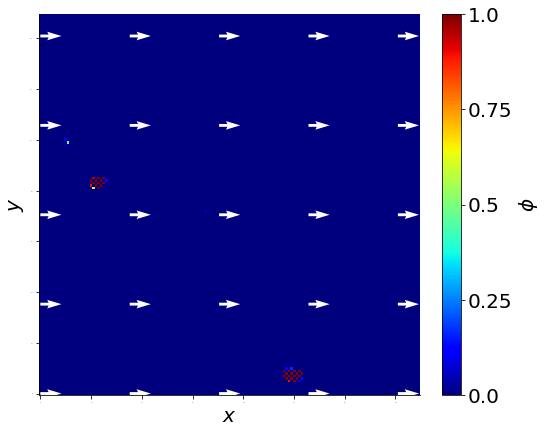

225000


In [65]:
plt.figure(1, figsize=[10, 7])
fntsize=20

im=plt.imshow(dot_product,cmap='jet',vmin=0,interpolation='nearest',vmax=0.15*mineral_umbral,origin='lower')

cb = plt.colorbar(im ,fraction=0.046, pad=0.04)

labels = np.linspace(0,1,5)
loc    = np.linspace(0,0.15*mineral_umbral,5)

cb.set_ticks(loc)
cb.set_ticklabels(labels)
cb.ax.tick_params(labelsize=20)
cb.set_label(label='$ \phi $',size=20)


skip = (slice(None, None, 35), slice(None, None, 35))
plt.quiver(x[skip], y[skip], u[skip], v[skip], color='white')#,headwidth=3, scale=3001,headlength=1)
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
#plt.savefig('EDO_mean_run{}.png'.format(run),format='png')

outname='FNA_many_lambda_run{}'.format(run)
#plt.savefig(outname+'.jpg', format='jpg')
#plt.savefig(outname+'.pdf', format='pdf')

plt.show()
print(75*mineral_umbral)



---

⭕:
**Make several runs and scatterplot population or calcification as a cloud of points. do this for the different models used**

---



In [ ]:
#df=pd.DataFrame({'time':times})
#df.insert(run,'population_run_{}'.format(run),population)
#df.insert(run+1,'ca2mean_run_{}'.format(run),Ca2_mean)

In [66]:
print(df)

    time  population_run_1  population_run_2  population_run_3  \
0      1                27                23                25   
1      2                40                37                31   
2      3                50                37                32   
3      4                53                38                35   
4      5                54                42                39   
..   ...               ...               ...               ...   
94    95                65               111                16   
95    96                65               109                16   
96    97                63               110                15   
97    98                63               109                15   
98    99                62               109                15   

    population_run_4  population_run_5  population_run_6  population_run_7  \
0                 22                12                22                14   
1                 27                18             

In [67]:
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.cm as cm
nombre = ['population_run_{}'.format(x) for x in runs]
print(nombre)

['population_run_1', 'population_run_2', 'population_run_3', 'population_run_4', 'population_run_5', 'population_run_6', 'population_run_7', 'population_run_8', 'population_run_9', 'population_run_10', 'population_run_11', 'population_run_12', 'population_run_13', 'population_run_14', 'population_run_15', 'population_run_16', 'population_run_17', 'population_run_18', 'population_run_19', 'population_run_20']


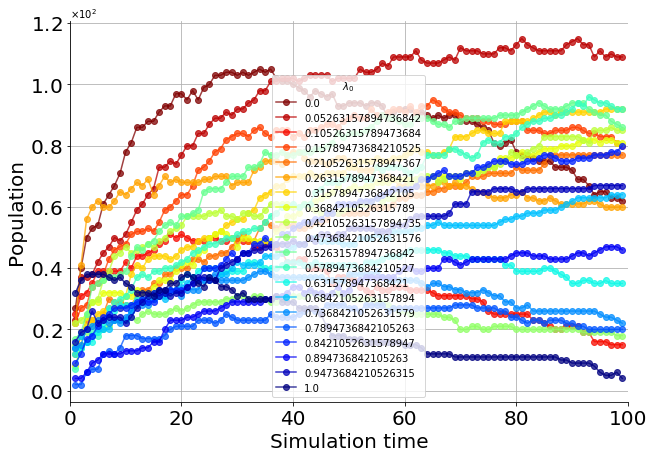

In [68]:
plt.figure(1, figsize=[10, 7])
r=20
nValues=np.arange(0,r,1)

normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
#colormap = cm.Greys
#colormap = cm.viridis
#colormap = cm.gnuplot2
#colormap=cm.inferno
#colormap=cm.magma
colormap=cm.jet_r
dicc = {}

markers=['o','*','.','s','v','^','x','D']
kas=np.linspace(0,1,20)
for i,labl in enumerate(nombre):  #f[x,y] (x:filas, y:columnas)
    #print(i,labl)
    plt.plot(df['time'][::1],df[labl][::1], marker=markers[0],linestyle='-',
             label='{}'.format(kas[i],'.f') , color=colormap(normalize(i)),alpha=0.75)

plt.legend(title='$\lambda_0$ ')
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


plt.xlim(0,100)
#plt.ylim(0,0.1e4)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.legend( title='Gs')
#plt.title('Ruido de disparo')
plt.ylabel('Population',fontsize=20)
#plt.ylabel('SNR',fontsize=25)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Simulation time',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ticklabel_format(axis="y", style="scientific", scilimits=(0,0),useMathText=True)
plt.grid()

outname='FNA_many_v-Population_vs_time'
#plt.savefig(outname+'.jpg', format='jpg')
#plt.savefig(outname+'.pdf', format='pdf')


plt.show()

In [69]:
nombreca = ['ca2mean_run_{}'.format(x) for x in runs]

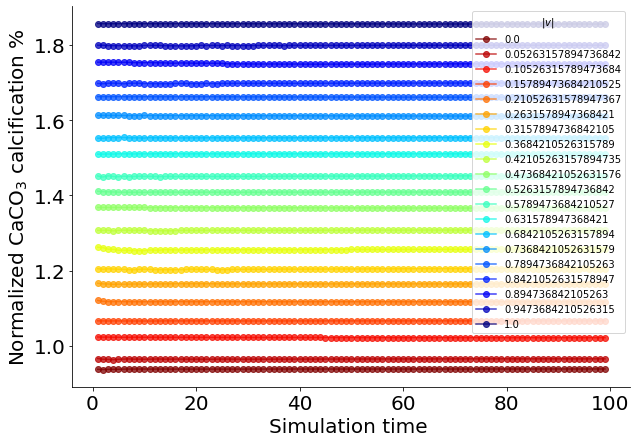

In [70]:
plt.figure(1, figsize=[10, 7])

c10=np.max(df.max())
c0=np.min(df.min())

for i,labl in enumerate(nombreca):  #f[x,y] (x:filas, y:columnas)
    #print(i,labl)


    func = (abs(df[labl][::1]) -c0 )/(c10-c0)
    
    plt.plot(df['time'][::1],func, marker=markers[0],linestyle='-',
             label='{}'.format(kas[i]) , color=colormap(normalize(i)),alpha=0.75)
    #print(np.max(abs(dd[labl][::4])))
#plt.rcParams['axes.spines.right'] = False
#plt.rcParams['axes.spines.top'] = False

plt.legend(title='$|v|$ ')

#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.legend( title='Gs')
#plt.title('Ruido de disparo')
plt.ylabel('Normalized CaCO$_3$ calcification %',fontsize=20)
#plt.ylabel('SNR',fontsize=25)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Simulation time ',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.ticklabel_format(axis="y", style="scientific", scilimits=(0,0),useMathText=True)


outname='FNA_many_v-Mineralization_vs_time'
#plt.savefig(outname+'.jpg', format='jpg')
#plt.savefig(outname+'.pdf', format='pdf')


plt.show()

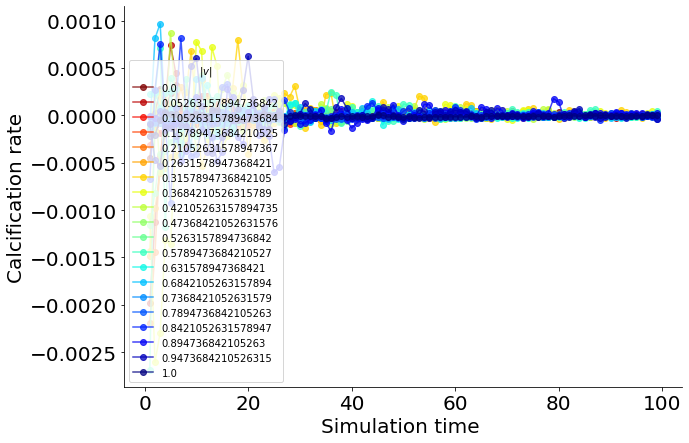

In [71]:
plt.figure(1, figsize=[10, 7])

c10=np.max(df.max())
c0=np.min(df.min())

for i,labl in enumerate(nombreca):  #f[x,y] (x:filas, y:columnas)
    #print(i,labl)


    func = (abs(df[labl][::1]) -c0 )/(c10-c0)
    rate = np.gradient(func)
    plt.plot(df['time'][::1],rate, marker=markers[0],linestyle='-',
             label='{}'.format(kas[i]) , color=colormap(normalize(i)),alpha=0.75)
    #print(np.max(abs(dd[labl][::4])))
#plt.rcParams['axes.spines.right'] = False
#plt.rcParams['axes.spines.top'] = False

plt.legend(title='$|v|$ ')

#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.legend( title='Gs')
#plt.title('Ruido de disparo')
plt.ylabel('Calcification rate',fontsize=20)
#plt.ylabel('SNR',fontsize=25)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Simulation time ',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.ticklabel_format(axis="y", style="scientific", scilimits=(0,0),useMathText=True)


outname='FNA_many_v-Mineralization_rate'
#plt.savefig(outname+'.jpg', format='jpg')
#plt.savefig(outname+'.pdf', format='pdf')


plt.show()

In [72]:
df.to_csv('FNA_several_lambda1_.csv', sep=',', index=False, encoding='utf-8')

In [73]:
print('n:',n)
print('tmax:',tmax)
print('lambda_0:',0.025)
print('lambda_1:',0.000015)
print('h=h0*np.sin(t/5)')

n: 150
tmax: 100
lambda_0: 0.025
lambda_1: 1.5e-05
h=h0*np.sin(t/5)


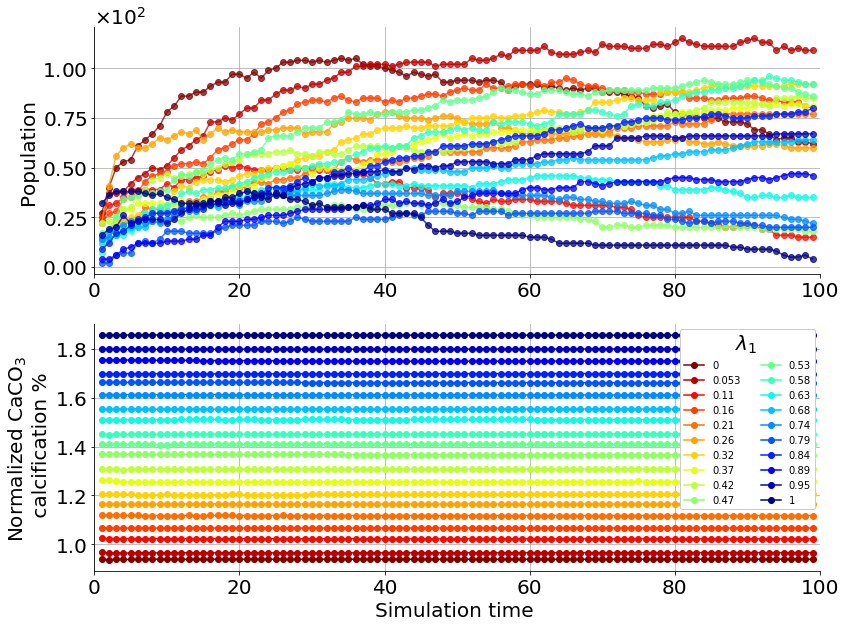

In [75]:
fig,ax= plt.subplots(2,1,figsize=[13, 10])


for i,labl in enumerate(nombreca):
    func = (abs(df[labl][::1]) -c0 )/(c10-c0)
    ax[1].plot(df['time'][::1],func, marker=markers[0],linestyle='-',
             label='{0:.2g}'.format(kas[i]) , color=colormap(normalize(i)),alpha=1)
    
for i,labl in enumerate(nombre): 

    ax[0].plot(df['time'][::1],df[labl][::1], marker=markers[0],linestyle='-', color=colormap(normalize(i)),alpha=0.75)
    

    

ax[0].set_ylabel('Population',fontsize=20)
ax[1].set_ylabel('Normalized CaCO$_3$ \n calcification %',fontsize=20)

ax[0].tick_params(labelsize=20)
ax[0].ticklabel_format(axis="y", style="scientific", scilimits=(0,0),useMathText=True)

ax[0].yaxis.get_offset_text().set_fontsize(20)
ax[0].grid()


plt.xlabel('Simulation time ',fontsize=20)
ax[0].set_xlim(0,100)
ax[1].set_xlim(0,100)
#ax[1].set_ylim(0,1.1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(title='$\lambda_1$ ',loc='upper right',ncol=2,framealpha=1,title_fontsize=20)

outname='FNA_lambda_1_2graphs'
plt.savefig(outname+'.jpg', format='jpg')
plt.savefig(outname+'.pdf', format='pdf')
plt.show()

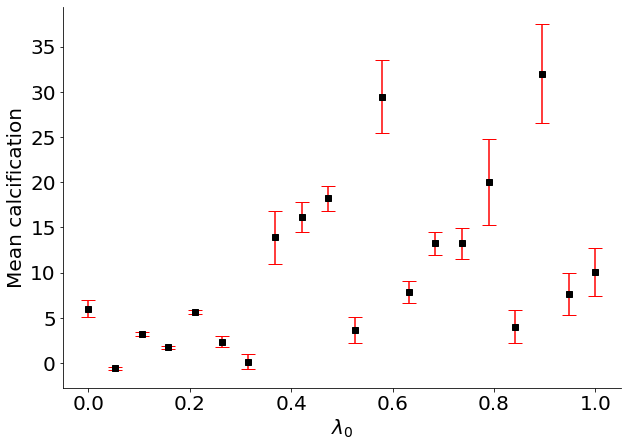

In [55]:
gmax=[]
gmin=[]
gmean=[]
vv=[]



plt.figure(1, figsize=[10, 7])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


for i,labl in enumerate(nombreca):
    g = np.mean(df[labl][::1])
    gerr = np.max(df[labl][::1]) - np.min(df[labl][::1])
    
    gmean.append(g)
    gmax.append(np.max(df[labl][::1]))
    gmin.append(np.min(df[labl][::1]))
    vv.append(kas[i])
    plt.errorbar(kas[i],g,yerr=gerr/2,color='black',marker='s',capsize=7,ecolor='red')
    #plt.scatter(1.2*i,g,color='black',marker='D')
    
#plt.plot(vv,gmax,color='black')
#plt.plot(vv,gmin,color='black')
#plt.fill_between(vv,gmin,gmax,color='red',alpha=0.15)
plt.xlabel('$\lambda_0$',fontsize=20)
plt.ylabel('Mean calcification',fontsize=20)

outname='Many_lambda_0_mean_cal'
plt.savefig(outname+'.jpg', format='jpg')
plt.savefig(outname+'.pdf', format='pdf')

plt.show()

In [64]:
dd=pd.DataFrame({'v':vv,'g':gmean,'gmin':gmin,'gmax':gmax})
#dd.insert(4,'g2',gmean)
print(dd)

       v          g  gmin  gmax
0    0.0  57.080808    20    69
1    1.2  36.606061     6    53
2    2.4  18.929293    11    24
3    3.6  36.818182     8    55
4    4.8  37.777778     7    54
5    6.0  22.585859     7    34
6    7.2  18.131313     6    21
7    8.4  52.161616    25    61
8    9.6  39.636364    19    44
9   10.8  38.757576    22    47
10  12.0  32.828283     6    47
11  13.2  38.191919     8    52
12  14.4  15.969697     3    30
13  15.6  35.616162     9    45
14  16.8  60.434343    15    74
15  18.0  44.131313    28    49
16  19.2   1.363636     0     3
17  20.4  14.696970     1    28
18  21.6  22.919192     3    34
19  22.8  59.000000    33    67
20  24.0  18.737374     4    26
21  25.2  31.313131    15    35
22  26.4  39.505051    11    47
23  27.6  55.383838    23    64
24  28.8  42.353535     7    53
25  30.0  31.343434     4    45
